# Challenge 2.2.7

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns

I will be building a text classifier on Amazon reviews for electronics.  There are 500 positive and 500 negative reviews in the dataset.

[This dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) is from the UCI Machine Learning database. It was created for the paper [From Group to Individual Labels using Deep Features](http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf), Kotzias et. al., KDD 2015.

In [2]:
# Grab and process the raw data.
df_raw = pd.read_csv('datafiles/sentiment labelled sentences/amazon_cells_labelled.txt', 
                     sep="\t", header=None, error_bad_lines=False)
df_raw.columns = ['comment','positive']

In [3]:
df_raw.head(10)

,comment,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [4]:
df_raw.positive.value_counts()

1    500
0    500
Name: positive, dtype: int64

Creating columns that indiate whether or not the comment contains select positive keywords.

In [5]:
keywords = ['great','good','love','recommend','nice','excellent', 'best','simple','reasonabl', 'beautiful'
            ,'satisfied','quality','easy','works','well', 'must have','happy', 'sturdy','fast','pleased',
           'superb']

for key in keywords:
    df_raw[str(key)] = df_raw.comment.str.contains(str(key), case=False)

In [6]:
df_raw.head()

,comment,positive,great,good,love,recommend,nice,excellent,best,simple,...,quality,easy,works,well,must have,happy,sturdy,fast,pleased,superb
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Checking Naive Bayes assumption that variables are independent from each other using a correlation heatmap.

It looks pretty good!

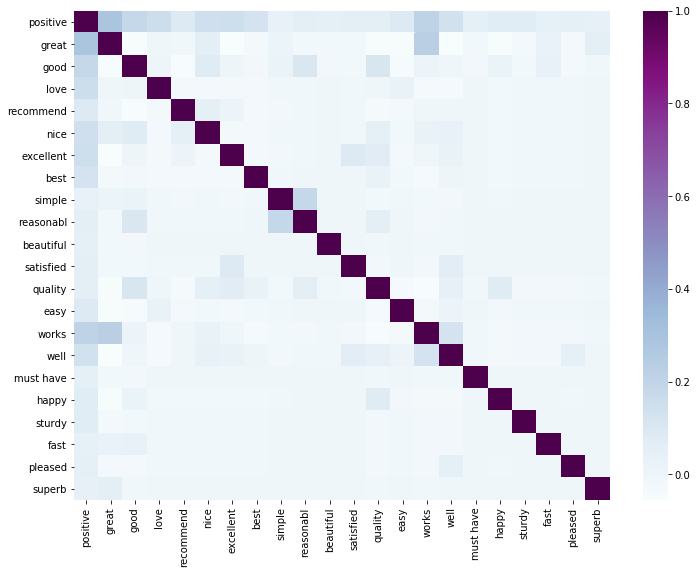

In [7]:
#Set up matplotlib
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(df_raw.corr(), cmap='BuPu')

Setting up input and output variables to put in model.

In [8]:
data = df_raw[keywords]
target = df_raw['positive']

Building model using Bernoulli classifier, since our data is binary (0, 1 positive comment).

In [9]:
# Instantiate model and store it in variable bnb
bnb = BernoulliNB()

# Fit model to data
bnb.fit(data, target)

# Classify and store result in new variable
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 218


Model has a 78.2% accuracy.

Now let's try it on yelp reviews!

In [10]:
# Grab and process the raw data.
yelp = pd.read_csv('datafiles/sentiment labelled sentences/yelp_labelled.txt', 
                     sep="\t", header=None, error_bad_lines=False)
yelp.columns = ['comment','positive']

In [11]:
yelp.head()

,comment,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Creating columns with positive keywords to indicate whether or not they are present in comment.

In [12]:
keywords = ['great','good','love','recommend','nice','excellent', 'best','simple','reasonabl', 'beautiful'
            ,'satisfied','quality','easy','works','well', 'must have','happy', 'sturdy','fast','pleased',
           'superb']

for key in keywords:
    yelp[str(key)] = yelp.comment.str.contains(str(key), case=False)

In [13]:
yelp.head()

,comment,positive,great,good,love,recommend,nice,excellent,best,simple,...,quality,easy,works,well,must have,happy,sturdy,fast,pleased,superb
0,Wow... Loved this place.,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Storing inputs and outputs...

In [14]:
data = yelp[keywords]
target = yelp['positive']

In [15]:
y_bnb = BernoulliNB()

y_bnb.fit(data, target)

y_pred = y_bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 314


Not surprisingly, the model performed worse on Yelp reviews, as some of the keywords are more product-oriented (eg. study, easy, simple).  The accuracy of the model on yelp reviews is 68.6%